=== 곤지암 리조트 수요예측 데모 분석 ===

baseline_submission.csv 파일을 찾을 수 없습니다.
샘플 데이터 생성 중...

=== 업장별 수요 분석 ===
느티나무 셀프BBQ:
  - 총 수요량: 4,317
  - 일평균 수요량: 61.7
  - 메뉴 수: 5개
담하:
  - 총 수요량: 4,446
  - 일평균 수요량: 63.5
  - 메뉴 수: 6개
라그로타:
  - 총 수요량: 4,205
  - 일평균 수요량: 60.1
  - 메뉴 수: 5개
미라시아:
  - 총 수요량: 4,165
  - 일평균 수요량: 59.5
  - 메뉴 수: 5개
카페테리아:
  - 총 수요량: 4,093
  - 일평균 수요량: 58.5
  - 메뉴 수: 5개

=== 메뉴 상관관계 분석 ===

느티나무 셀프BBQ 업장:
  1인 수저세트 ↔ 스프라이트 (단체): 0.395
  본삼겹 (단품,실내) ↔ 스프라이트 (단체): 0.390
  BBQ55(단체) ↔ 콜라 (단체): 0.375
  스프라이트 (단체) ↔ 콜라 (단체): 0.364
  1인 수저세트 ↔ 콜라 (단체): 0.352

담하 업장:
  물냉면 ↔ 비빔냉면: 0.451
  비빔냉면 ↔ 콜라: 0.402
  물냉면 ↔ 참이슬: 0.367
  참이슬 ↔ 콜라: 0.357
  담하 한우 불고기 ↔ 콜라: 0.339

라그로타 업장:
  강한 상관관계 없음

미라시아 업장:
  브런치(대인) 주중 ↔ BBQ Platter: 0.424
  BBQ Platter ↔ 코카콜라: 0.336

카페테리아 업장:
  짜장면 ↔ 짬뽕: 0.326
  아메리카노(ICE) ↔ 짬뽕: 0.316

=== 메인-서브 메뉴 분류 ===

느티나무 셀프BBQ:
  메인메뉴 (3개):
    - 1인 수저세트
    - BBQ55(단체)
    - 본삼겹 (단품,실내)
  서브메뉴 (2개):
    - 스프라이트 (단체)
    - 콜라 (단체)

담하:
  메인메뉴 (5개):
    - 담하 한우 불고기
    - 공깃

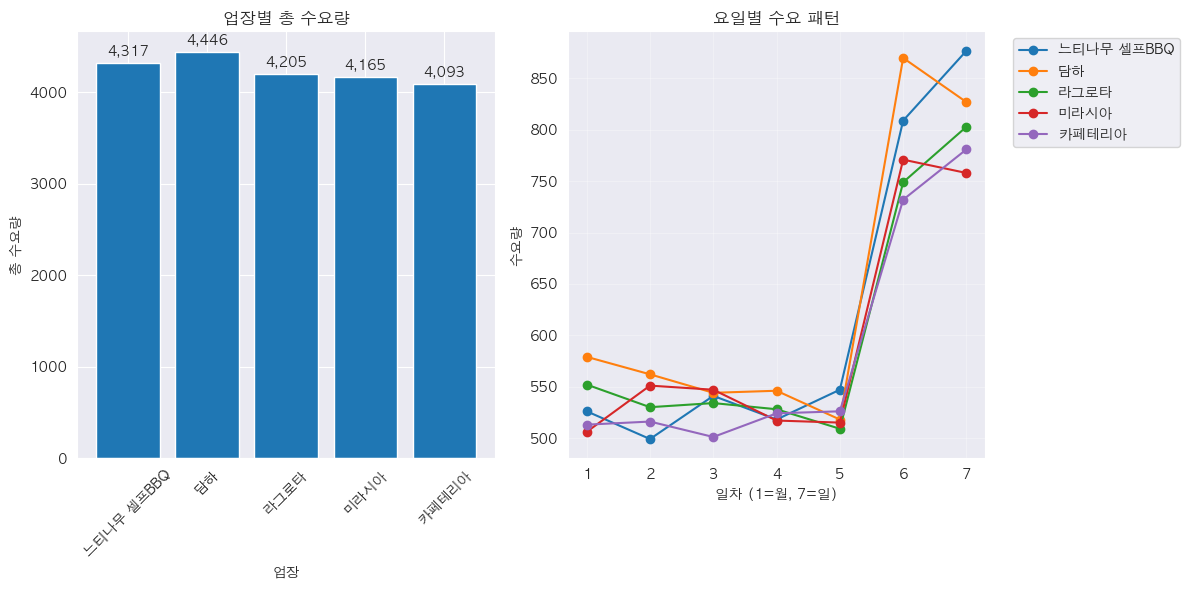

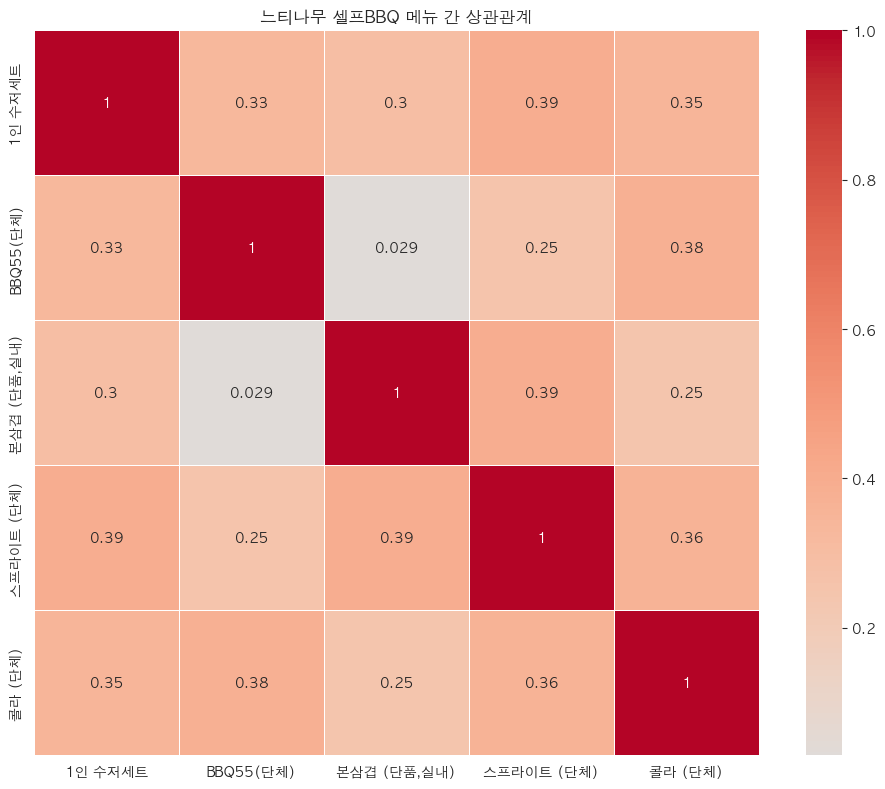

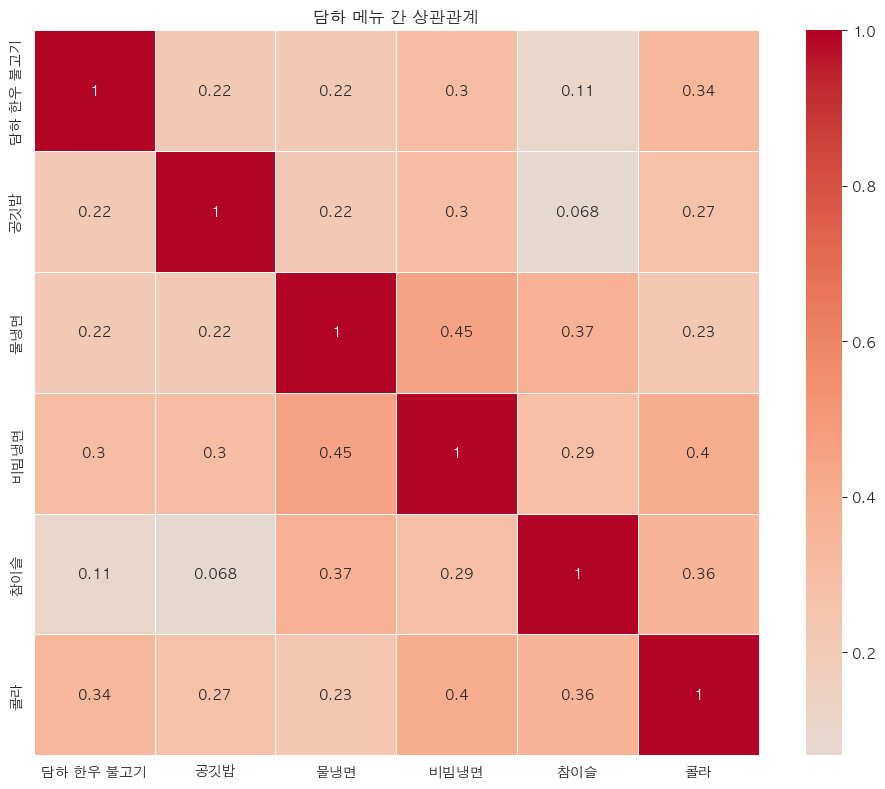

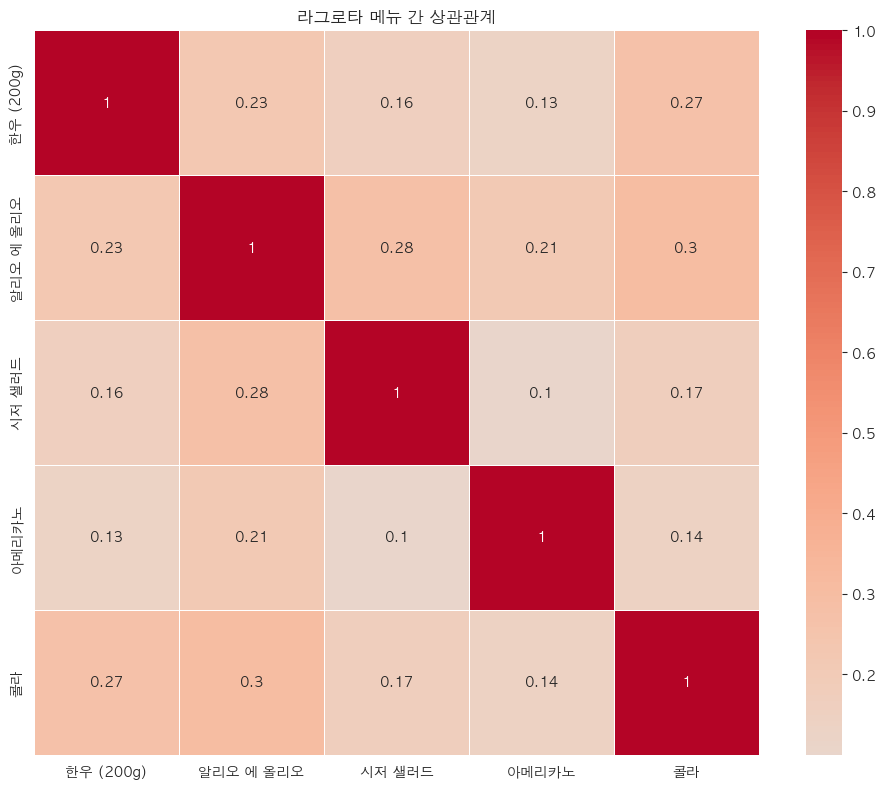

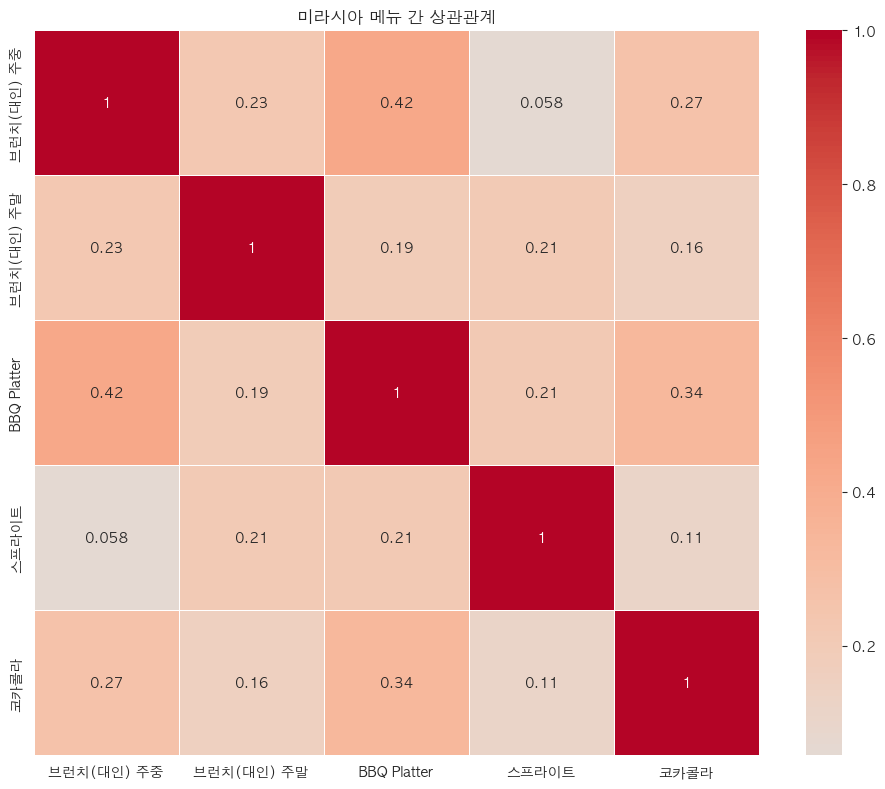

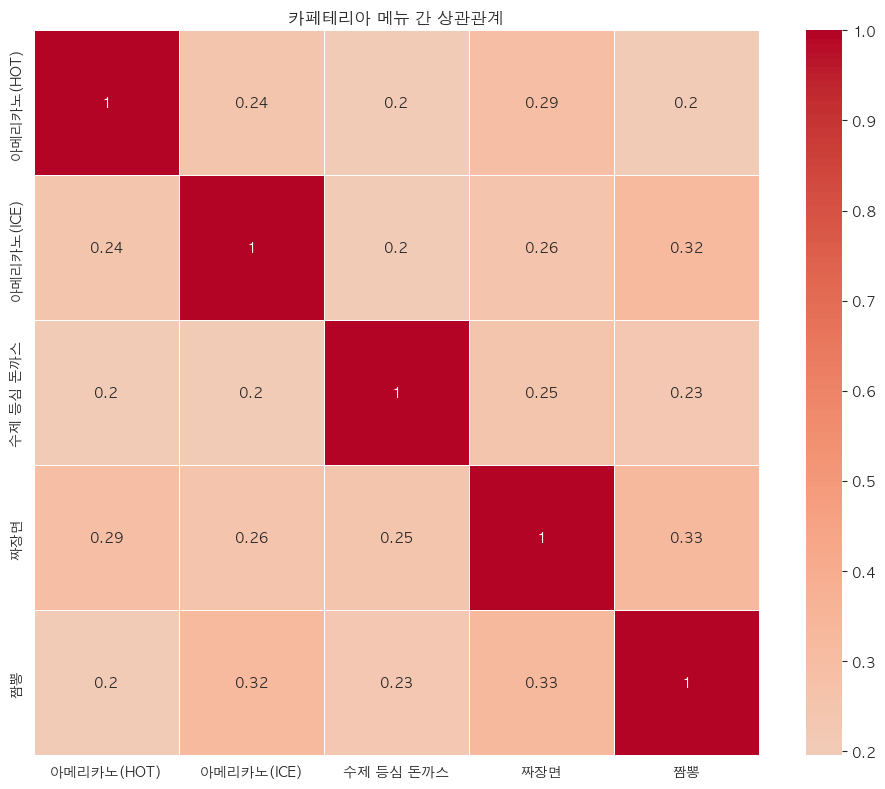


=== 주요 인사이트 ===
1. 최고 수요 업장: 담하 (총 4,446건)
2. 주말 효과 최대: 느티나무 셀프BBQ (+36.7%)
3. 메뉴 다양성 최고: 담하 (6개 메뉴)

=== 분석 완료 ===


In [1]:
# 곤지암 리조트 수요예측 데모 분석
# 제공된 baseline_submission.csv 데이터를 기반으로 한 분석

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (macOS)
plt.rcParams['font.family'] = 'AppleGothic'  # macOS 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False

# ============================================================================
# 1. 데이터 로드 및 기본 분석
# ============================================================================

def load_baseline_data():
    """제공된 baseline_submission.csv 데이터 로드"""
    try:
        df = pd.read_csv('./baseline_submission.csv')
        print(f"데이터 로드 완료: {df.shape}")
        return df
    except FileNotFoundError:
        print("baseline_submission.csv 파일을 찾을 수 없습니다.")
        # 샘플 데이터 생성
        return create_sample_data()

def create_sample_data():
    """샘플 데이터 생성 (파일이 없을 경우)"""
    print("샘플 데이터 생성 중...")
    
    # 날짜 생성
    dates = []
    for i in range(10):  # TEST_00 ~ TEST_09
        for j in range(7):  # 각각 7일
            dates.append(f"TEST_{i:02d}+{j+1}일")
    
    # 업장별 메뉴 정의
    restaurants = {
        '느티나무 셀프BBQ': ['1인 수저세트', 'BBQ55(단체)', '본삼겹 (단품,실내)', '스프라이트 (단체)', '콜라 (단체)'],
        '담하': ['담하 한우 불고기', '공깃밥', '물냉면', '비빔냉면', '참이슬', '콜라'],
        '라그로타': ['한우 (200g)', '알리오 에 올리오', '시저 샐러드', '아메리카노', '콜라'],
        '미라시아': ['브런치(대인) 주중', '브런치(대인) 주말', 'BBQ Platter', '스프라이트', '코카콜라'],
        '카페테리아': ['아메리카노(HOT)', '아메리카노(ICE)', '수제 등심 돈까스', '짜장면', '짬뽕']
    }
    
    # 컬럼 생성
    columns = ['영업일자']
    for restaurant, menus in restaurants.items():
        for menu in menus:
            columns.append(f"{restaurant}_{menu}")
    
    # 데이터 생성
    data = []
    for date in dates:
        row = [date]
        for col in columns[1:]:
            # 랜덤한 수요량 생성 (실제 패턴 고려)
            restaurant = col.split('_')[0]
            menu = col.split('_', 1)[1]
            
            # 기본 수요량
            base_demand = np.random.poisson(10)
            
            # 요일 효과 (주말 증가)
            if 'TEST_' in date:
                day_num = int(date.split('+')[1].replace('일', ''))
                if day_num in [6, 7]:  # 주말
                    base_demand *= 1.5
            
            # 메뉴 타입별 조정
            if any(drink in menu for drink in ['콜라', '스프라이트', '아메리카노']):
                base_demand *= 1.2  # 음료는 더 많이 주문
            elif '밥' in menu or '면' in menu:
                base_demand *= 0.8  # 주식은 적당히
            
            row.append(max(0, int(base_demand)))
        
        data.append(row)
    
    df = pd.DataFrame(data, columns=columns)
    return df

# ============================================================================
# 2. 업장별 분석
# ============================================================================

def analyze_restaurants(df):
    """업장별 수요 분석"""
    print("\n=== 업장별 수요 분석 ===")
    
    # 업장명 추출
    menu_columns = [col for col in df.columns if col != '영업일자']
    restaurants = {}
    
    for col in menu_columns:
        if '_' in col:
            restaurant = col.split('_')[0]
            if restaurant not in restaurants:
                restaurants[restaurant] = []
            restaurants[restaurant].append(col)
    
    # 업장별 총 수요량
    restaurant_totals = {}
    for restaurant, menus in restaurants.items():
        total_demand = df[menus].sum().sum()
        avg_daily_demand = df[menus].sum(axis=1).mean()
        restaurant_totals[restaurant] = {
            'total': total_demand,
            'daily_avg': avg_daily_demand,
            'menu_count': len(menus)
        }
    
    # 결과 출력
    for restaurant, stats in restaurant_totals.items():
        print(f"{restaurant}:")
        print(f"  - 총 수요량: {stats['total']:,.0f}")
        print(f"  - 일평균 수요량: {stats['daily_avg']:.1f}")
        print(f"  - 메뉴 수: {stats['menu_count']}개")
    
    return restaurants, restaurant_totals

# ============================================================================
# 3. 메뉴 상관관계 분석
# ============================================================================

def analyze_menu_correlations(df, restaurants):
    """메뉴 간 상관관계 분석"""
    print("\n=== 메뉴 상관관계 분석 ===")
    
    correlation_results = {}
    
    for restaurant, menus in restaurants.items():
        if len(menus) < 2:
            continue
            
        print(f"\n{restaurant} 업장:")
        
        # 상관관계 계산
        corr_matrix = df[menus].corr()
        
        # 강한 상관관계 찾기
        strong_correlations = []
        for i, menu1 in enumerate(menus):
            for j, menu2 in enumerate(menus[i+1:], i+1):
                corr_value = corr_matrix.loc[menu1, menu2]
                if abs(corr_value) > 0.3 and not np.isnan(corr_value):
                    menu1_short = menu1.split('_', 1)[1]
                    menu2_short = menu2.split('_', 1)[1]
                    strong_correlations.append({
                        'menu1': menu1_short,
                        'menu2': menu2_short,
                        'correlation': corr_value
                    })
        
        # 상관관계 출력
        if strong_correlations:
            strong_correlations.sort(key=lambda x: abs(x['correlation']), reverse=True)
            for corr in strong_correlations[:5]:  # 상위 5개만
                print(f"  {corr['menu1']} ↔ {corr['menu2']}: {corr['correlation']:.3f}")
        else:
            print("  강한 상관관계 없음")
        
        correlation_results[restaurant] = {
            'matrix': corr_matrix,
            'strong_correlations': strong_correlations
        }
    
    return correlation_results

# ============================================================================
# 4. 메인-서브 메뉴 분류
# ============================================================================

def classify_menu_types(restaurants, df):
    """메인 메뉴와 서브 메뉴 분류"""
    print("\n=== 메인-서브 메뉴 분류 ===")
    
    menu_classification = {}
    
    for restaurant, menus in restaurants.items():
        main_menus = []
        sub_menus = []
        
        for menu_col in menus:
            menu_name = menu_col.split('_', 1)[1].lower()
            avg_order = df[menu_col].mean()
            
            # 음료류는 서브메뉴
            if any(keyword in menu_name for keyword in ['콜라', '스프라이트', '맥주', '소주', '막걸리', '아메리카노', '라떼', '음료']):
                sub_menus.append(menu_col)
            # 밥, 면, 고기류는 메인메뉴
            elif any(keyword in menu_name for keyword in ['밥', '면', '탕', '찌개', '구이', '정식', '불고기', '갈비', '브런치', '플래터']):
                main_menus.append(menu_col)
            # 애매한 경우 주문량으로 판단
            else:
                overall_avg = df[[col for col in menus]].mean().mean()
                if avg_order > overall_avg * 0.8:
                    main_menus.append(menu_col)
                else:
                    sub_menus.append(menu_col)
        
        print(f"\n{restaurant}:")
        print(f"  메인메뉴 ({len(main_menus)}개):")
        for menu in main_menus:
            menu_short = menu.split('_', 1)[1]
            print(f"    - {menu_short}")
        
        print(f"  서브메뉴 ({len(sub_menus)}개):")
        for menu in sub_menus:
            menu_short = menu.split('_', 1)[1]
            print(f"    - {menu_short}")
        
        menu_classification[restaurant] = {
            'main': main_menus,
            'sub': sub_menus
        }
    
    return menu_classification

# ============================================================================
# 5. 수요 패턴 분석
# ============================================================================

def analyze_demand_patterns(df, restaurants):
    """수요 패턴 분석"""
    print("\n=== 수요 패턴 분석 ===")
    
    # 날짜별 패턴 분석
    df['일차'] = df['영업일자'].apply(lambda x: int(x.split('+')[1].replace('일', '')) if '+' in x else 1)
    df['테스트셋'] = df['영업일자'].apply(lambda x: x.split('+')[0])
    
    patterns = {}
    
    for restaurant, menus in restaurants.items():
        restaurant_daily = df.groupby('일차')[menus].sum().sum(axis=1)
        
        # 요일별 평균
        weekday_avg = restaurant_daily.mean()
        weekend_peak = restaurant_daily[[6, 7]].mean() if len(restaurant_daily) >= 7 else weekday_avg
        
        # 주말 증가율
        weekend_increase = (weekend_peak / weekday_avg - 1) * 100 if weekday_avg > 0 else 0
        
        patterns[restaurant] = {
            'weekday_avg': weekday_avg,
            'weekend_peak': weekend_peak,
            'weekend_increase': weekend_increase,
            'daily_pattern': restaurant_daily
        }
        
        print(f"\n{restaurant}:")
        print(f"  평일 평균: {weekday_avg:.1f}")
        print(f"  주말 평균: {weekend_peak:.1f}")
        print(f"  주말 증가율: {weekend_increase:.1f}%")
    
    return patterns

# ============================================================================
# 6. 시각화
# ============================================================================

def create_visualizations(df, restaurants, patterns):
    """분석 결과 시각화"""
    print("\n=== 시각화 생성 중 ===")
    
    # 1. 업장별 총 수요량
    plt.figure(figsize=(12, 6))
    restaurant_totals = []
    restaurant_names = []
    
    for restaurant, menus in restaurants.items():
        total = df[menus].sum().sum()
        restaurant_totals.append(total)
        restaurant_names.append(restaurant)
    
    plt.subplot(1, 2, 1)
    bars = plt.bar(restaurant_names, restaurant_totals)
    plt.title('업장별 총 수요량')
    plt.xlabel('업장')
    plt.ylabel('총 수요량')
    plt.xticks(rotation=45)
    
    # 막대 위에 값 표시
    for bar, total in zip(bars, restaurant_totals):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(restaurant_totals)*0.01,
                f'{total:,.0f}', ha='center', va='bottom')
    
    # 2. 요일별 수요 패턴
    plt.subplot(1, 2, 2)
    df['일차'] = df['영업일자'].apply(lambda x: int(x.split('+')[1].replace('일', '')) if '+' in x else 1)
    
    for restaurant, menus in restaurants.items():
        daily_pattern = df.groupby('일차')[menus].sum().sum(axis=1)
        plt.plot(daily_pattern.index, daily_pattern.values, marker='o', label=restaurant)
    
    plt.title('요일별 수요 패턴')
    plt.xlabel('일차 (1=월, 7=일)')
    plt.ylabel('수요량')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 3. 히트맵 (업장별 메뉴 상관관계)
    for restaurant, menus in restaurants.items():
        if len(menus) > 3:  # 메뉴가 3개 이상인 경우만
            plt.figure(figsize=(10, 8))
            corr_matrix = df[menus].corr()
            
            # 메뉴명 단축
            short_names = [menu.split('_', 1)[1][:15] for menu in menus]
            corr_matrix.index = short_names
            corr_matrix.columns = short_names
            
            sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
                       square=True, linewidths=0.5)
            plt.title(f'{restaurant} 메뉴 간 상관관계')
            plt.tight_layout()
            plt.show()

# ============================================================================
# 7. 메인 실행
# ============================================================================

def main():
    """메인 분석 실행"""
    print("=== 곤지암 리조트 수요예측 데모 분석 ===\n")
    
    # 1. 데이터 로드
    df = load_baseline_data()
    
    # 2. 업장별 분석
    restaurants, restaurant_totals = analyze_restaurants(df)
    
    # 3. 메뉴 상관관계 분석
    correlations = analyze_menu_correlations(df, restaurants)
    
    # 4. 메인-서브 메뉴 분류
    menu_classification = classify_menu_types(restaurants, df)
    
    # 5. 수요 패턴 분석
    demand_patterns = analyze_demand_patterns(df, restaurants)
    
    # 6. 시각화
    create_visualizations(df, restaurants, demand_patterns)
    
    # 7. 인사이트 요약
    print("\n=== 주요 인사이트 ===")
    
    # 가장 인기 있는 업장
    max_restaurant = max(restaurant_totals.items(), key=lambda x: x[1]['total'])
    print(f"1. 최고 수요 업장: {max_restaurant[0]} (총 {max_restaurant[1]['total']:,.0f}건)")
    
    # 주말 효과가 큰 업장
    max_weekend_effect = max(demand_patterns.items(), key=lambda x: x[1]['weekend_increase'])
    print(f"2. 주말 효과 최대: {max_weekend_effect[0]} (+{max_weekend_effect[1]['weekend_increase']:.1f}%)")
    
    # 메뉴 다양성
    max_diversity = max(restaurant_totals.items(), key=lambda x: x[1]['menu_count'])
    print(f"3. 메뉴 다양성 최고: {max_diversity[0]} ({max_diversity[1]['menu_count']}개 메뉴)")
    
    print(f"\n=== 분석 완료 ===")
    
    return {
        'data': df,
        'restaurants': restaurants,
        'correlations': correlations,
        'menu_classification': menu_classification,
        'demand_patterns': demand_patterns
    }

# 실행
if __name__ == "__main__":
    results = main()